### Data Visualization using Agriculture dataset from kagel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data using pandas
df = pd.read_csv('India Agriculture Crop Production.csv')
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [3]:
df.sample(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
243665,Karnataka,DAVANGERE,Dry chillies,2017-18,Rabi,564.0,Hectare,1135.0,Tonnes,2.012411
110383,Maharashtra,NANDURBAR,Other Rabi pulses,2009-10,Rabi,400.0,Hectare,300.0,Tonnes,0.750000
213164,Tamil Nadu,COIMBATORE,Sesamum,2014-15,Rabi,5.0,Hectare,4.0,Tonnes,0.800000


In [4]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [5]:
df.shape

(345407, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,345374.0,11670.191258,4.583843e+04,0.004,74.000000,532.0,4110.00000,8.580100e+06
Production,340414.0,958371.148664,2.152986e+07,0.000,87.000000,717.0,7176.00000,1.597800e+09
Yield,345374.0,79.407569,9.166287e+02,0.000,0.546742,1.0,2.46708,4.395833e+04


In [8]:
# type of unique crops
print("total number of unique crops: ",len(df['Crop'].unique()))
print('\n',df['Crop'].unique())

total number of unique crops:  57

 ['Arecanut' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut' 'Dry chillies'
 'Ginger' 'Other Kharif pulses' 'other oilseeds' 'Rice' 'Sugarcane'
 'Sweet potato' 'Arhar/Tur' 'Bajra' 'Castor seed' 'Coriander'
 'Cotton(lint)' 'Gram' 'Groundnut' 'Horse-gram' 'Jowar' 'Linseed' 'Maize'
 'Mesta' 'Moong(Green Gram)' 'Niger seed' 'Onion' 'Other Rabi pulses'
 'Potato' 'Ragi' 'Rapeseed &Mustard' 'Safflower' 'Sesamum' 'Small millets'
 'Soyabean' 'Sunflower' 'Tapioca' 'Tobacco' 'Turmeric' 'Urad' 'Wheat'
 'Oilseeds total' 'Jute' 'Masoor' 'Peas & beans (Pulses)' 'Barley'
 'Garlic' 'Khesari' 'Sannhamp' 'Guar seed' 'Moth' 'Cardamom'
 'Other Cereals' 'Cowpea(Lobia)' 'Dry Ginger' 'Other Summer Pulses' nan]


In [9]:
df['Production Units'].unique()

array(['Tonnes', 'Nuts', 'Bales'], dtype=object)

In [10]:
df[df['Production Units']=='Tonnes'].head(1)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541


In [11]:
df[df['Production Units']=='Nuts'].head(1)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
20,Andaman and Nicobar Islands,NICOBARS,Coconut,2001-02,Whole Year,18190.0,Hectare,64430000.0,Nuts,3542.056075


In [12]:
df[df['Production Units']=='Bales'].head(1)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
546,Andhra Pradesh,ADILABAD,Cotton(lint),2001-02,Kharif,175552.0,Hectare,270557.0,Bales,1.541179


In [15]:
# Nuts and Bales are not standard unit as Tonnes is
# we need to change then unit one single unit (Tonnes)
# Approx one coconut contains 300 to 350 ml of water which is equavalent of 350 gm or 0.35k
# and 1 Bales equals 217kg (approx)

conversion_factor = {'Tonnes':1, 'Nuts':0.00035,'Bales':0.217}

def convert_to_unit(row):
    return row['Production']*conversion_factor[row['Production Units']]

df['Production'] = df.apply(convert_to_unit, axis=1)


In [19]:
df.drop(['Production Units'], axis=1, inplace=True)
df.sample(4)

,State,District,Crop,Year,Season,Area,Area Units,Production,Yield
16469,Karnataka,GADAG,Other Kharif pulses,2003-04,Kharif,312.0,Hectare,87.0,0.278846
190479,Himachal Pradesh,SIRMAUR,Garlic,2015-16,Rabi,2767.0,Hectare,4625.0,1.671485
254687,Meghalaya,SOUTH WEST GARO HILLS,Ginger,2018-19,Kharif,194.0,Hectare,5431.0,27.994845
200469,Madhya Pradesh,RAISEN,Urad,2015-16,Kharif,20000.0,Hectare,9000.0,0.450000


## Different contributions for total Productions

In [31]:
# plotting total production state-wise
total_prod = df.groupby('State')['Production'].sum().reset_index()
total_prod.head(5)

,State,Production
0,Andaman and Nicobar Islands,1.763114e+06
1,Andhra Pradesh,8.260572e+08
2,Arunachal Pradesh,9.522010e+06
3,Assam,1.706174e+08
4,Bihar,5.214250e+08


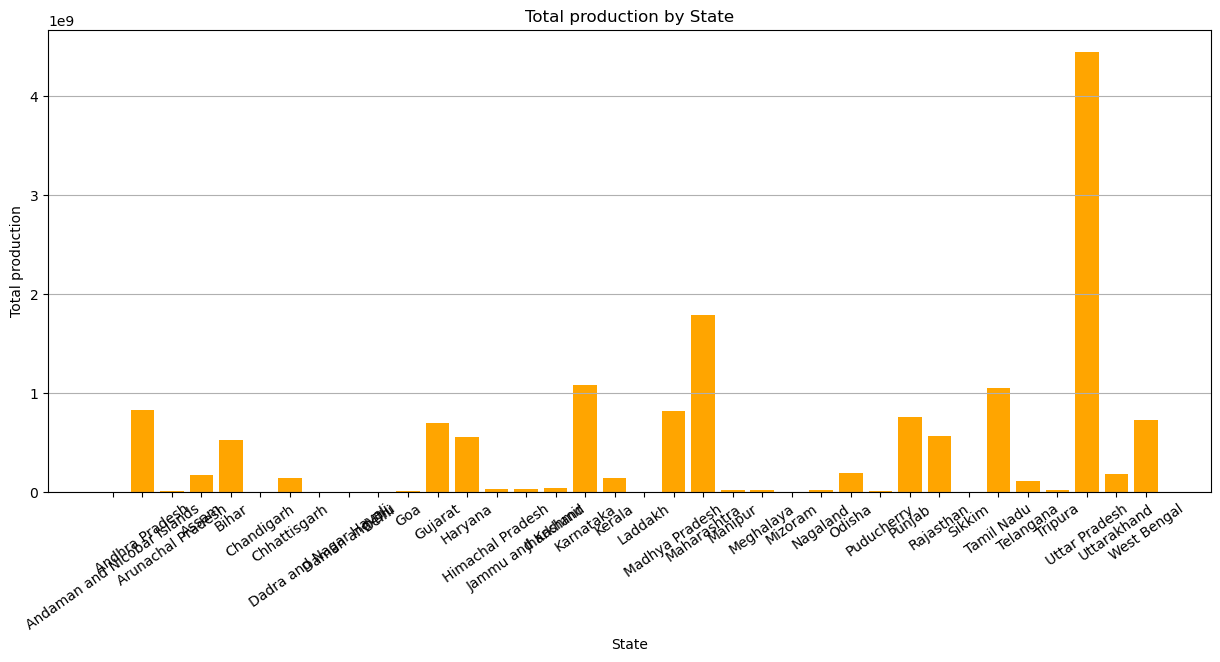

In [32]:
plt.figure(figsize=(15,6))
plt.bar(total_prod['State'], total_prod['Production'], color='orange')
plt.xlabel('State')
plt.ylabel('Total production')
plt.title('Total production by State')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

In [39]:
total_prod_state = total_prod.sort_values(by='Production', ascending=False)
top_5_state_by_production = total_prod_state.head(5)
top_5_state_by_production

,State,Production
33,Uttar Pradesh,4.442549e+09
20,Maharashtra,1.790301e+09
16,Karnataka,1.084472e+09
30,Tamil Nadu,1.049786e+09
1,Andhra Pradesh,8.260572e+08


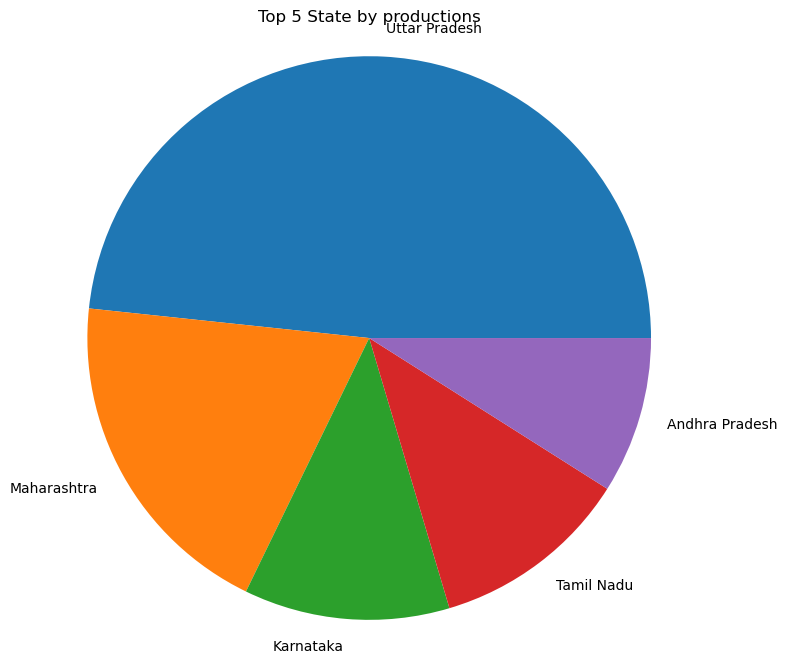

In [40]:
plt.figure(figsize=(8,8))
plt.pie(top_5_state_by_production['Production'], labels=top_5_state_by_production['State'])
plt.axis('equal')
plt.title('Top 5 State by productions')
plt.show()

##### Utter-Pradesh is leading in terms of total production state-wise followed by Maharashtra.

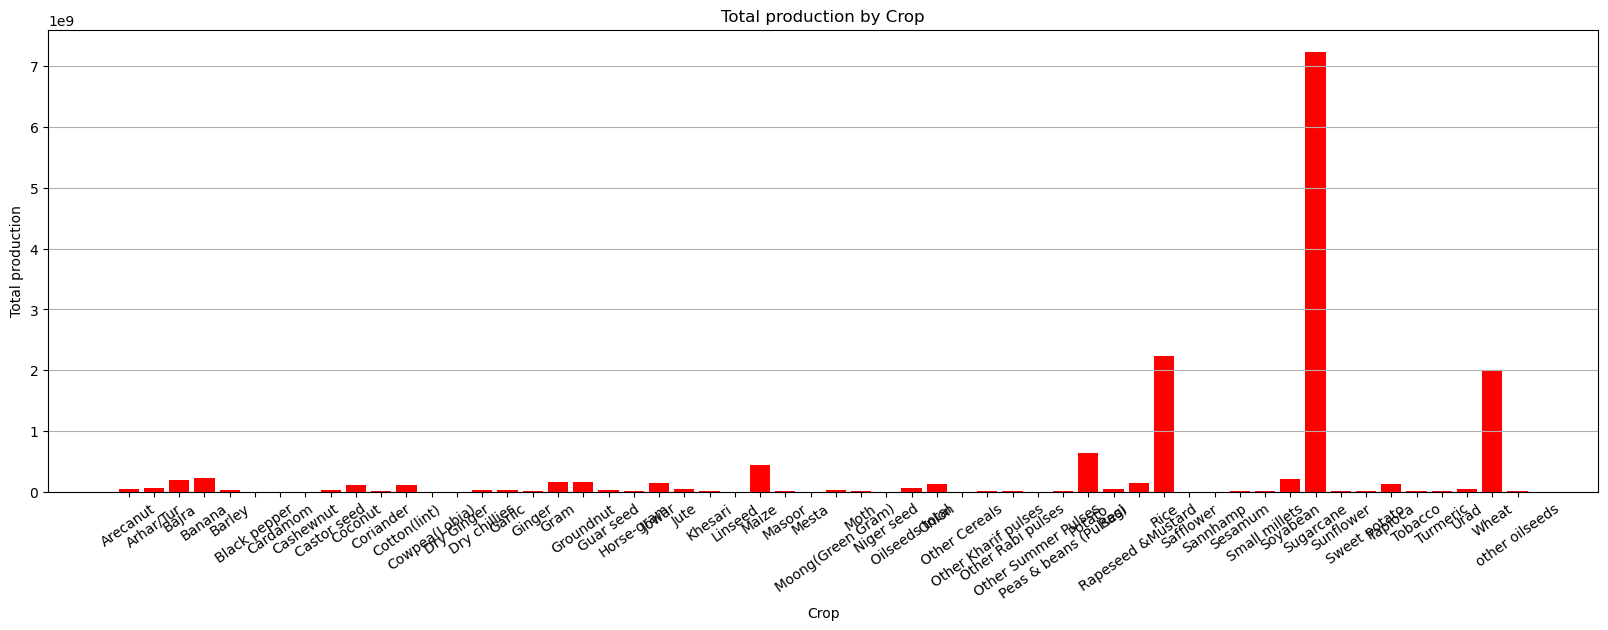

In [41]:
# plotting total production crop-wise
total_prod_crop = df.groupby('Crop')['Production'].sum().reset_index()
plt.figure(figsize=(20,6))
plt.bar(total_prod_crop['Crop'], total_prod_crop['Production'], color='red')
plt.xlabel('Crop')
plt.ylabel('Total production')
plt.title('Total production by Crop')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

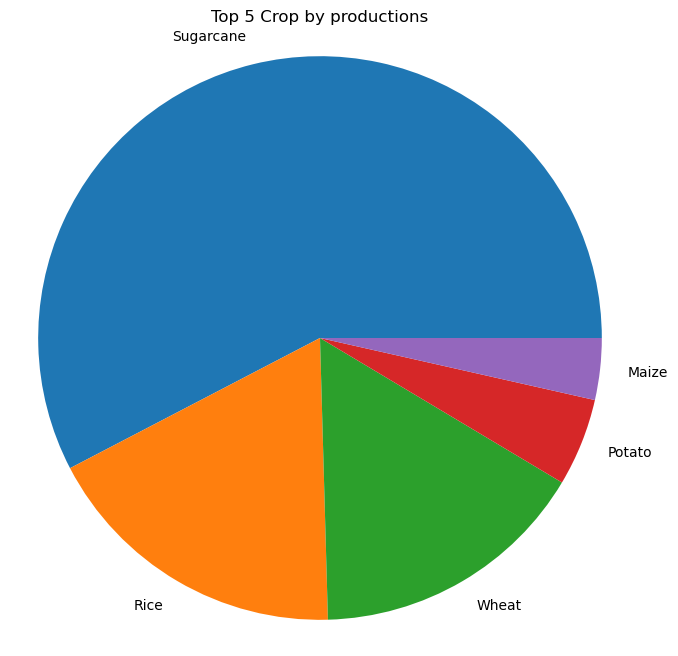

In [44]:
top_5_crop = total_prod_crop.sort_values(by='Production', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top_5_crop['Production'], labels=top_5_crop['Crop'])
plt.axis('equal')
plt.title('Top 5 Crop by productions')
plt.show()

##### Sugarcane tops as the highest production of crop followed by rice and wheat

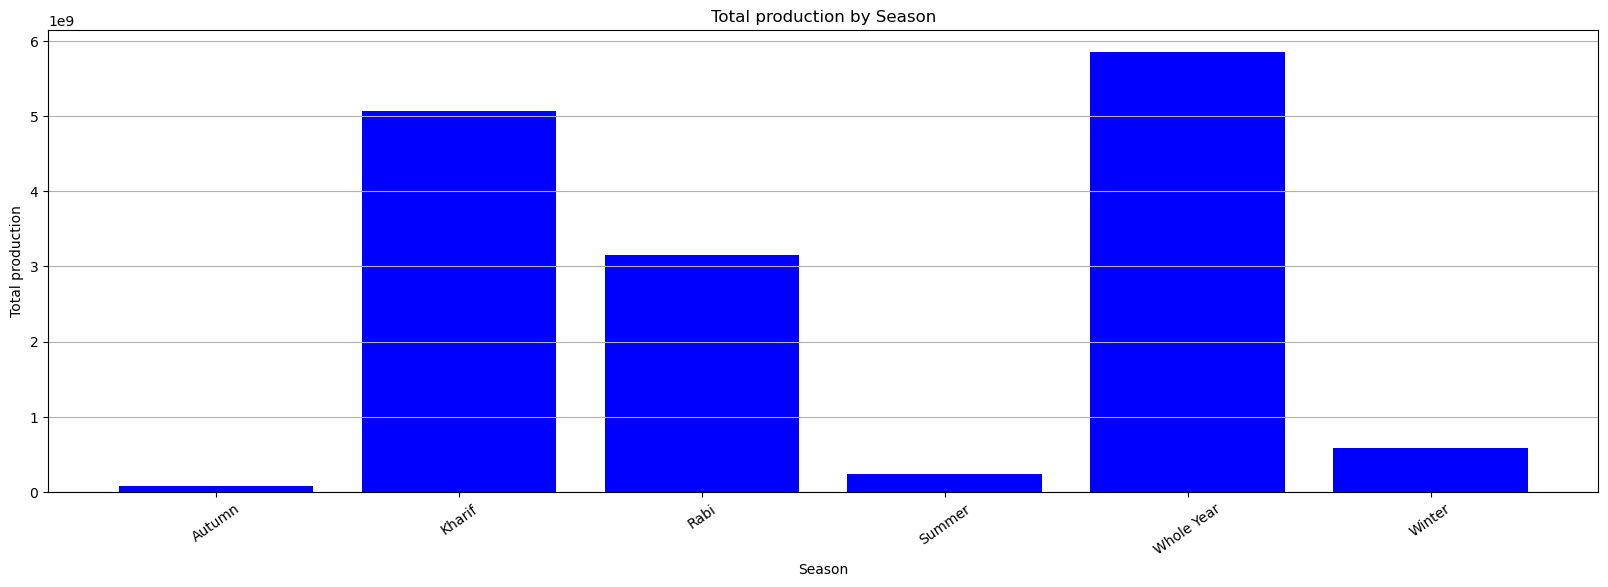

In [43]:
# plotting total production season-wise
total_prod_season = df.groupby('Season')['Production'].sum().reset_index()
plt.figure(figsize=(20,6))
plt.bar(total_prod_season['Season'], total_prod_season['Production'], color='blue')
plt.xlabel('Season')
plt.ylabel('Total production')
plt.title('Total production by Season')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

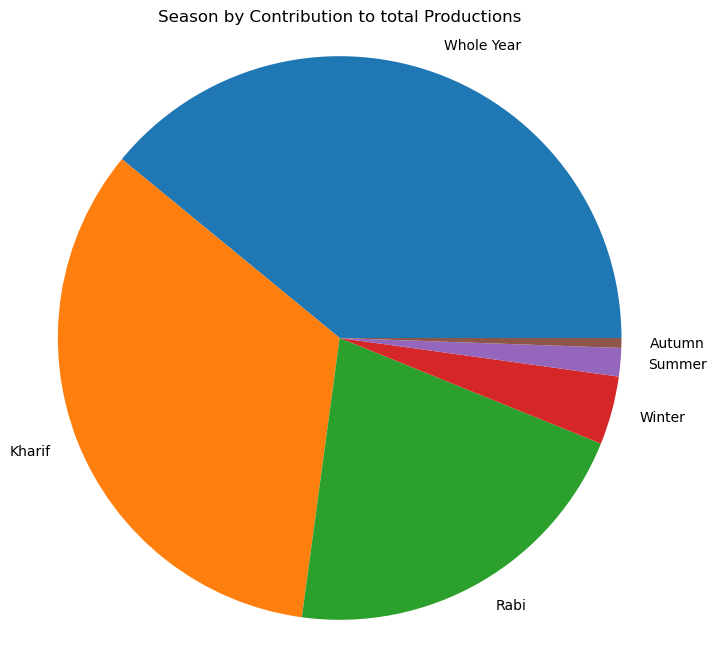

In [46]:
top_seasons = total_prod_season.sort_values(by='Production', ascending=False)
plt.figure(figsize=(8,8))
plt.pie(top_seasons['Production'], labels=top_seasons['Season'])
plt.axis('equal')
plt.title('Season by Contribution to total Productions')
plt.show()

##### Apart from whole year, Kharif crop production is more than those of rabi and winter taken together

## Finding data for crops that grow whole year and doing visualization

In [47]:
df_wholeyear = df[df['Season'] == 'Whole Year']
df_wholeyear.sample(3)

,State,District,Crop,Year,Season,Area,Area Units,Production,Yield
327790,Odisha,SUNDARGARH,Potato,2000-01,Whole Year,942.0,Hectare,5639.8,5.987049
106860,Madhya Pradesh,DAMOH,Masoor,2009-10,Whole Year,17439.0,Hectare,11859.0,0.680028
26754,Odisha,BHADRAK,Garlic,2002-03,Whole Year,150.0,Hectare,470.0,3.133333


In [49]:
# total production state-wise
total_prod_wholeyear = df_wholeyear.groupby('State')['Production'].sum().reset_index()
total_prod_wholeyear.head(5)

,State,Production
0,Andaman and Nicobar Islands,1.064549e+06
1,Andhra Pradesh,3.594695e+08
2,Arunachal Pradesh,3.317639e+06
3,Assam,5.913720e+07
4,Bihar,1.986884e+08


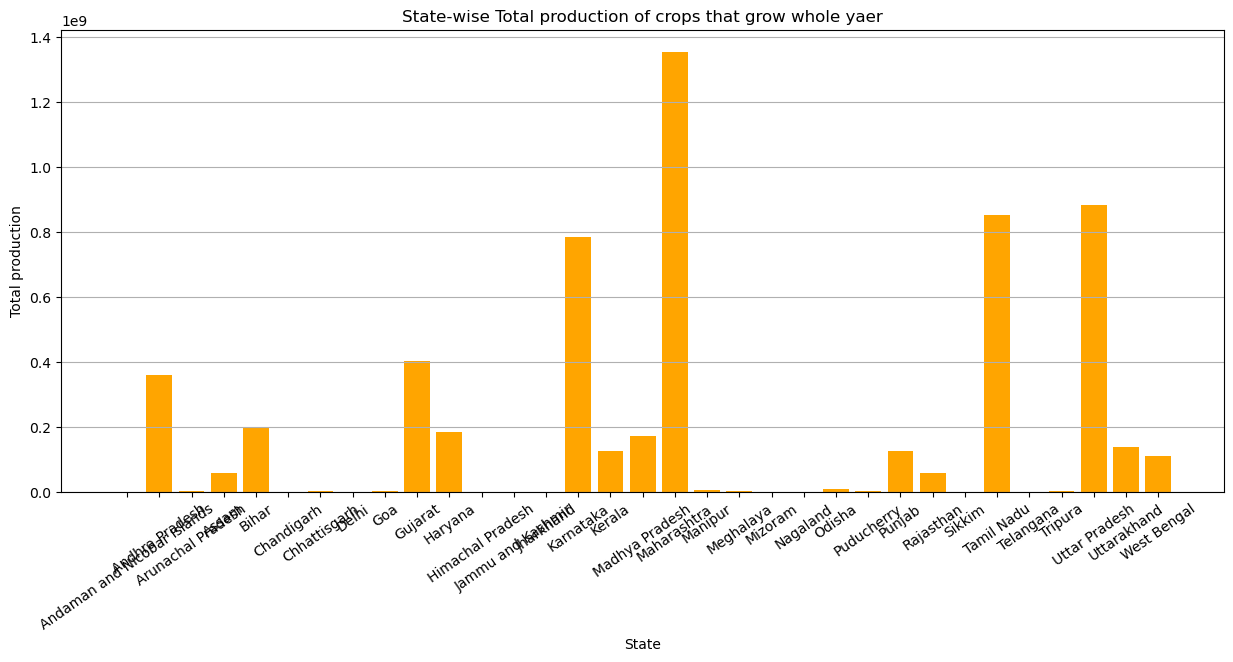

In [50]:
plt.figure(figsize=(15,6))
plt.bar(total_prod_wholeyear['State'], total_prod_wholeyear['Production'], color='orange')
plt.xlabel('State')
plt.ylabel('Total production')
plt.title('State-wise Total production of crops that grow whole yaer')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

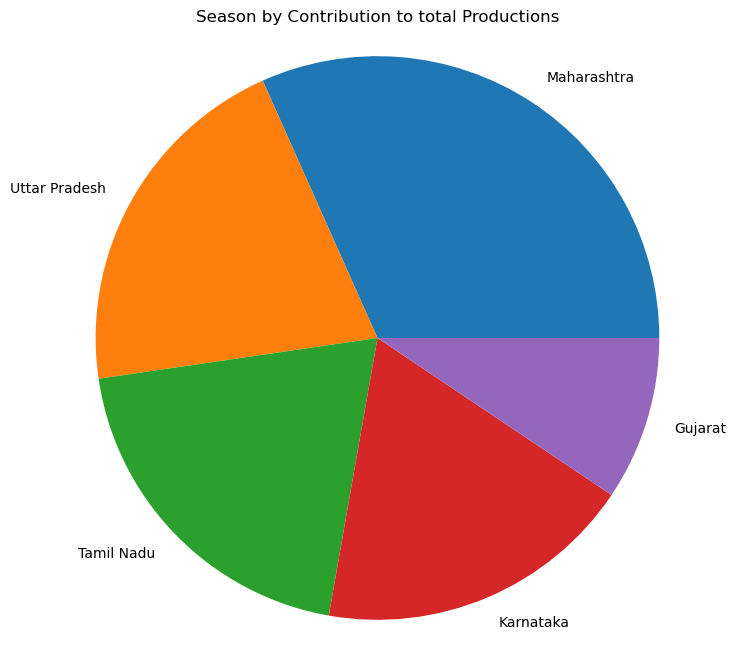

In [51]:
top_5_state_wholeyear = total_prod_wholeyear.sort_values(by='Production', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(total_prod_state_wholeyear['Production'], labels=total_prod_state_wholeyear['State'])
plt.axis('equal')
plt.title('Season by Contribution to total Productions')
plt.show()

#### For whole year crop Maharashtra tops the list followed by Utter pradesh and Tamil Nadu.

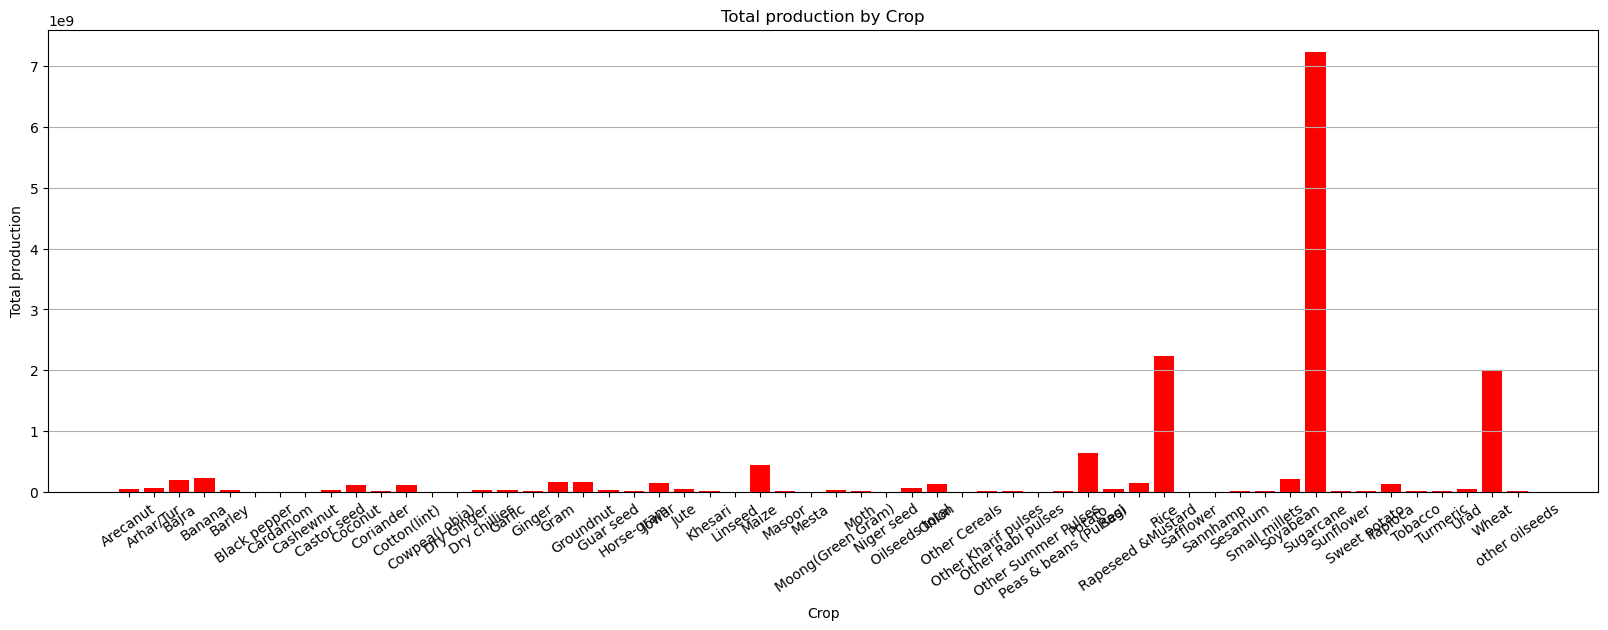

In [52]:
total_prod_crop_wholeyear = df_wholeyear.groupby('Crop')['Production'].sum().reset_index()
plt.figure(figsize=(20,6))
plt.bar(total_prod_crop['Crop'], total_prod_crop['Production'], color='red')
plt.xlabel('Crop')
plt.ylabel('Total production')
plt.title('Total production by Crop')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

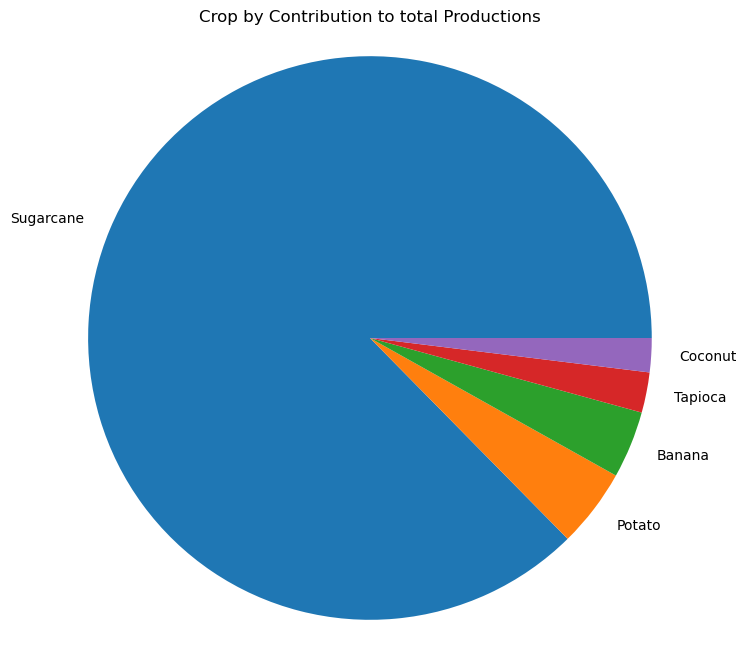

In [53]:
top_5_crop_wholeyear = total_prod_crop_wholeyear.sort_values(by='Production', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top_5_crop_wholeyear['Production'], labels=top_5_crop_wholeyear['Crop'])
plt.axis('equal')
plt.title('Crop by Contribution to total Productions')
plt.show()

#### For whole year production Sugarcane tops the list followed by Potato and Banana

### District-wise Production

In [56]:
total_prod_district = df.groupby('District')['Production'].sum().reset_index()
total_prod_district.sample(5)

,District,Production
224,GAURELLA-PENDRA-MARWAHI,1.322390e+05
197,EAST KAMENG,3.787740e+05
507,PATAN,6.590110e+06
316,KAMRUP,9.055966e+06
258,HAZARIBAGH,2.868331e+06


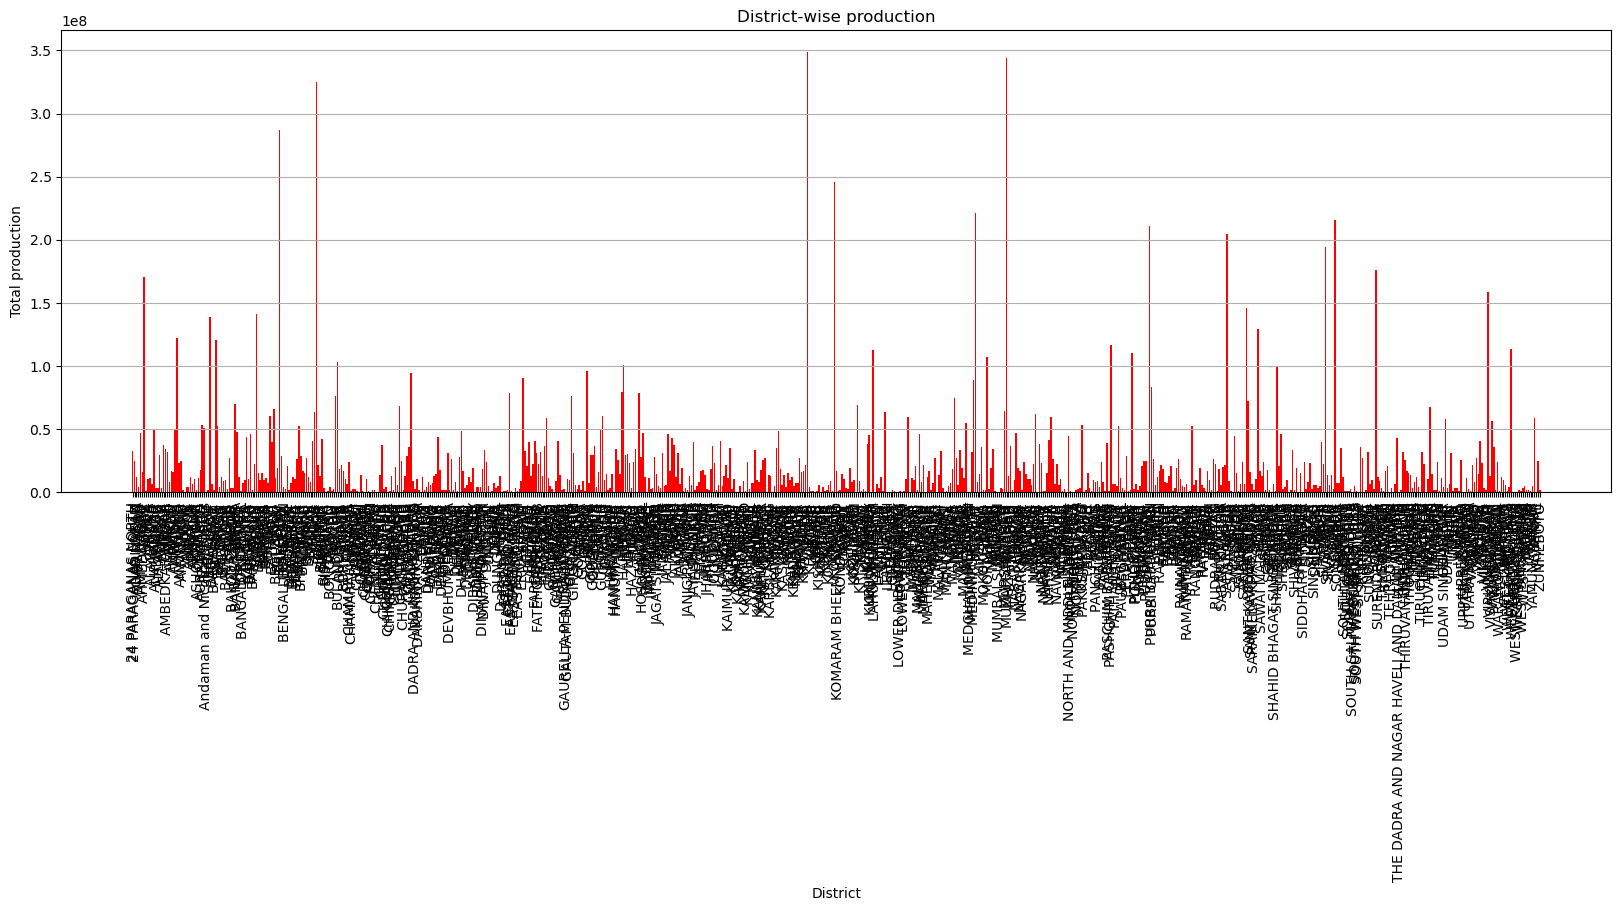

In [99]:
plt.figure(figsize=(20,6))
plt.bar(total_prod_district['District'], total_prod_district['Production'], color='red')
plt.xlabel('District')
plt.ylabel('Total production')
plt.title('District-wise production')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

###### Selecting only top 20 districts...

In [65]:
top_20_district = total_prod_district.sort_values(by='Production', ascending=False).head(20)
top_20_district.head(3)

,District,Production
349,KHERI,3.487277e+08
452,MUZAFFARNAGAR,3.437476e+08
95,BIJNOR,3.251854e+08


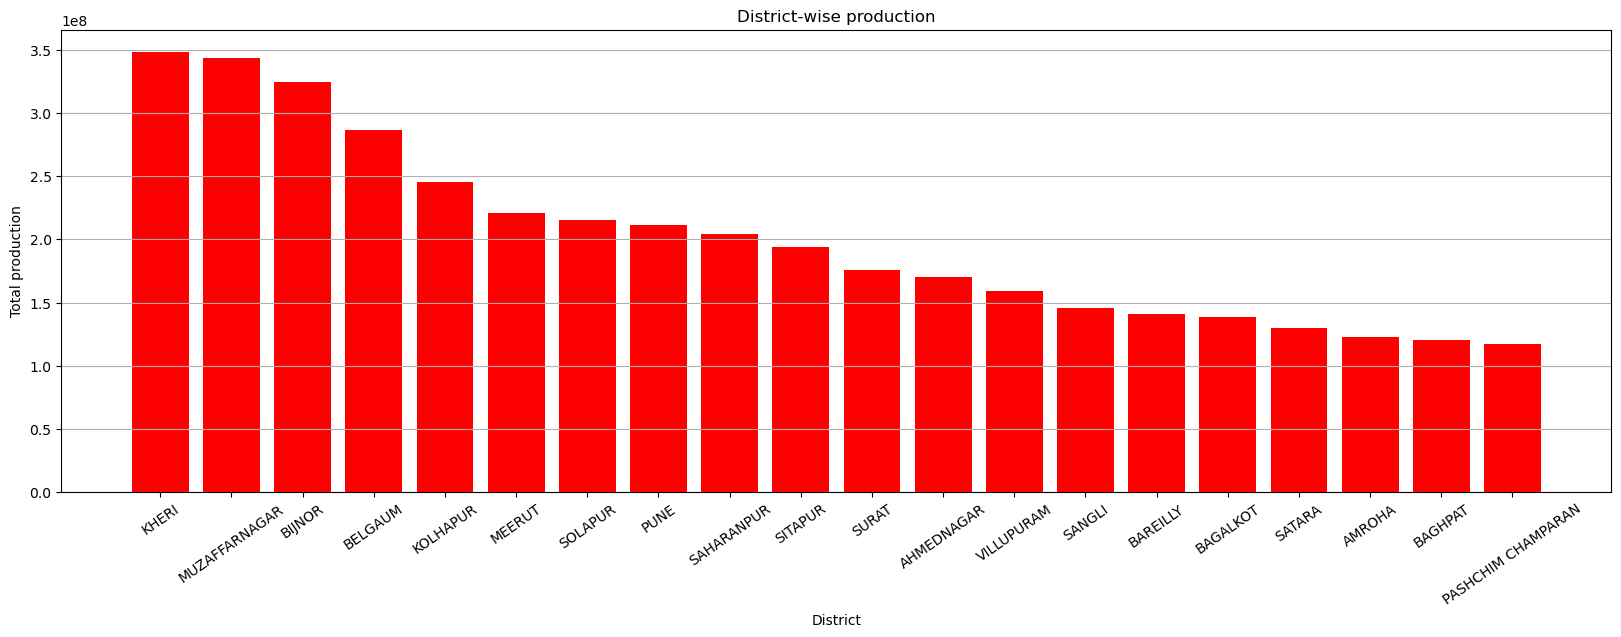

In [90]:
plt.figure(figsize=(20,6))
plt.bar(top_20_district['District'], top_20_district['Production'], color='red')
plt.xlabel('District')
plt.ylabel('Total production')
plt.title('District-wise production')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

##### Kheri tops the list in terms of production followed by Muzaffarnagar and Bijnor

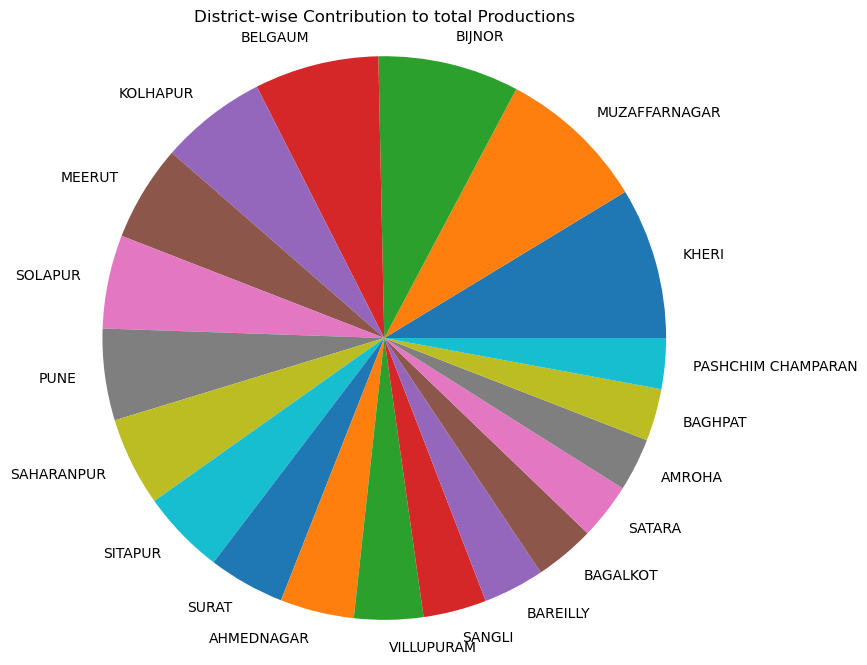

In [68]:
plt.figure(figsize=(8,8))
plt.pie(top_20_district['Production'], labels=top_20_district['District'])
plt.axis('equal')
plt.title('District-wise Contribution to total Productions')
plt.show()

## Different contributions for total Yields

#### States vs Yields

In [70]:
total_yield_state = df.groupby('State')['Yield'].sum().reset_index()
total_yield_state.head(5)

,State,Yield
0,Andaman and Nicobar Islands,2.360813e+05
1,Andhra Pradesh,3.482502e+06
2,Arunachal Pradesh,1.448151e+04
3,Assam,4.160130e+06
4,Bihar,9.337077e+04


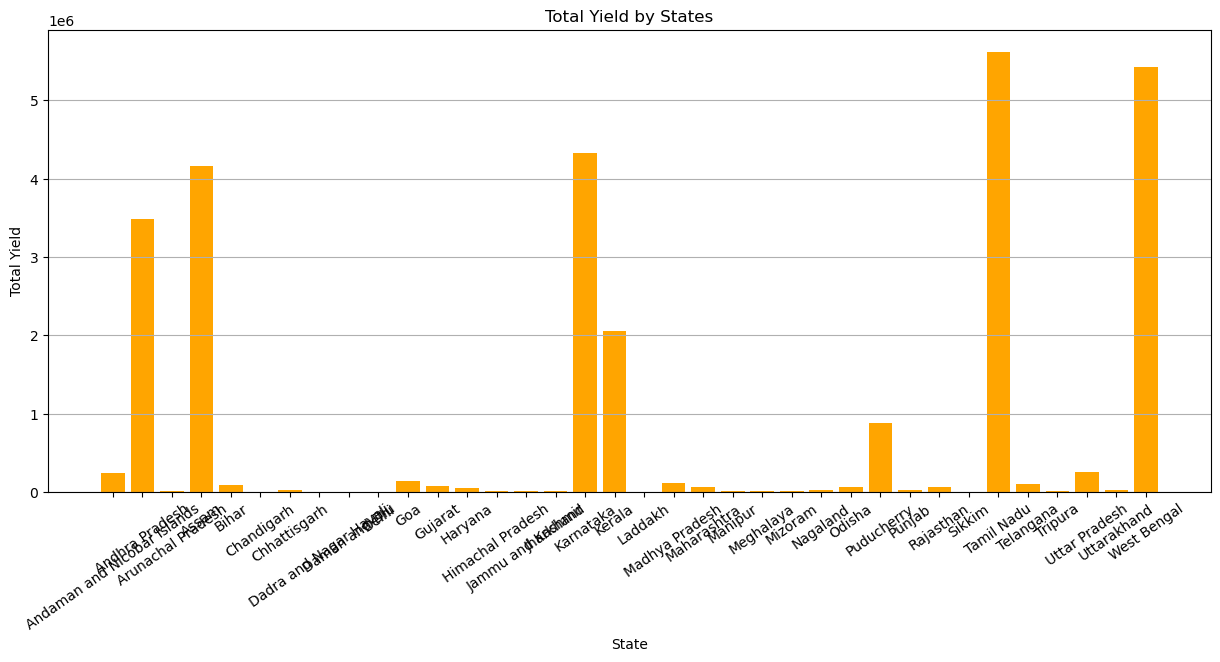

In [73]:
plt.figure(figsize=(15,6))
plt.bar(total_yield_state['State'], total_yield_state['Yield'], color='orange')
plt.xlabel('State')
plt.ylabel('Total Yield')
plt.title('Total Yield by States')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

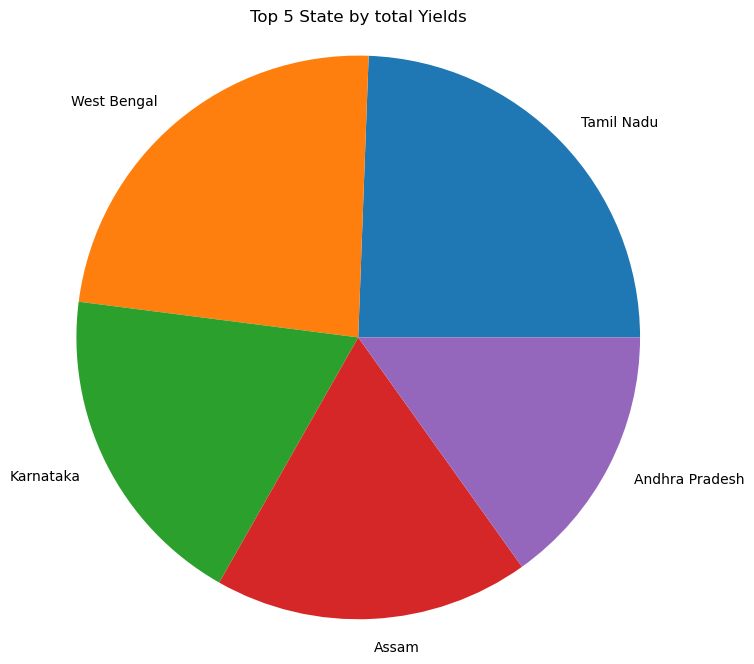

In [74]:
top_5_yield_state = total_yield_state.sort_values(by='Yield', ascending=False).head(5)
plt.figure(figsize=(8,8))
plt.pie(top_5_yield_state['Yield'], labels=top_5_yield_state['State'])
plt.axis('equal')
plt.title('Top 5 State by total Yields')
plt.show()

#### In terms of total Yield, Tamil Nadu tops the list followed by West Bengal and karnataka

#### Crops vs Yield

In [88]:
total_yield_crops = df.groupby('Crop')['Yield'].sum().reset_index()
total_yield_crops.head(3)

,Crop,Yield
0,Arecanut,5195.920248
1,Arhar/Tur,9528.326232
2,Bajra,9953.895909


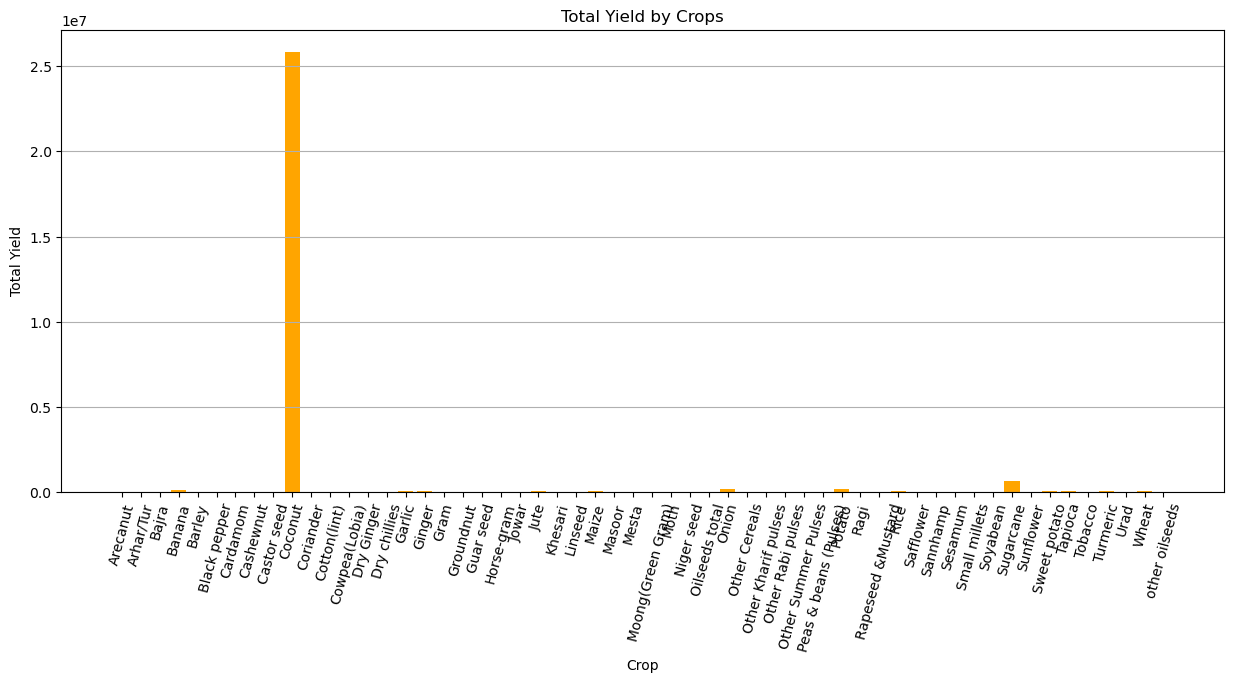

In [100]:
plt.figure(figsize=(15,6))
plt.bar(total_yield_crops['Crop'], total_yield_crops['Yield'], color='orange')
plt.xlabel('Crop')
plt.ylabel('Total Yield')
plt.title('Total Yield by Crops')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

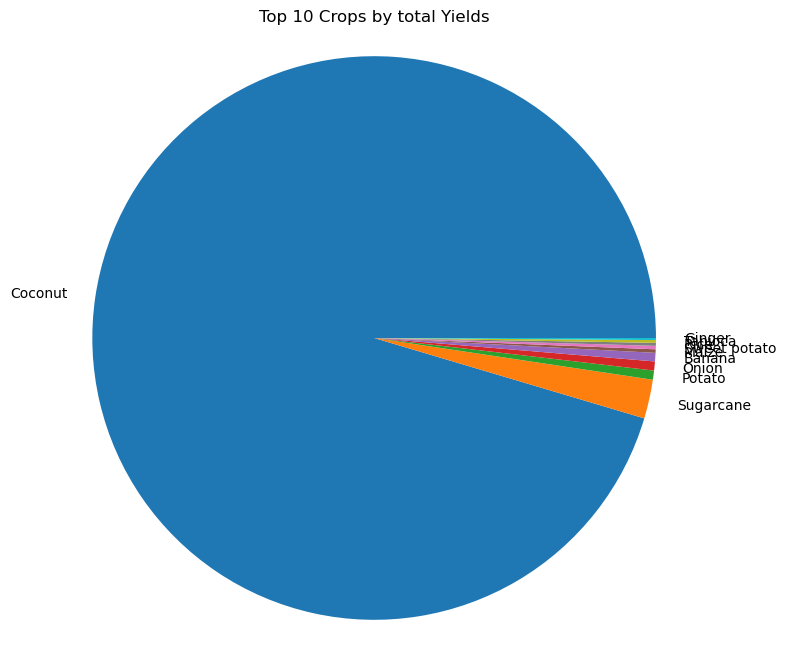

In [78]:
top_10_yield_crop = total_yield_crops.sort_values(by='Yield',ascending=False).head(10)
plt.figure(figsize=(8,8))
plt.pie(top_10_yield_crop['Yield'], labels=top_10_yield_crop['Crop'])
plt.axis('equal')
plt.title('Top 10 Crops by total Yields')
plt.show()

#### Coconut tops the list followed by sugarcane and potato (In terms of Yield)

#### Season vs Yield

In [80]:
total_yield_season = df.groupby('Season')['Yield'].sum().reset_index()

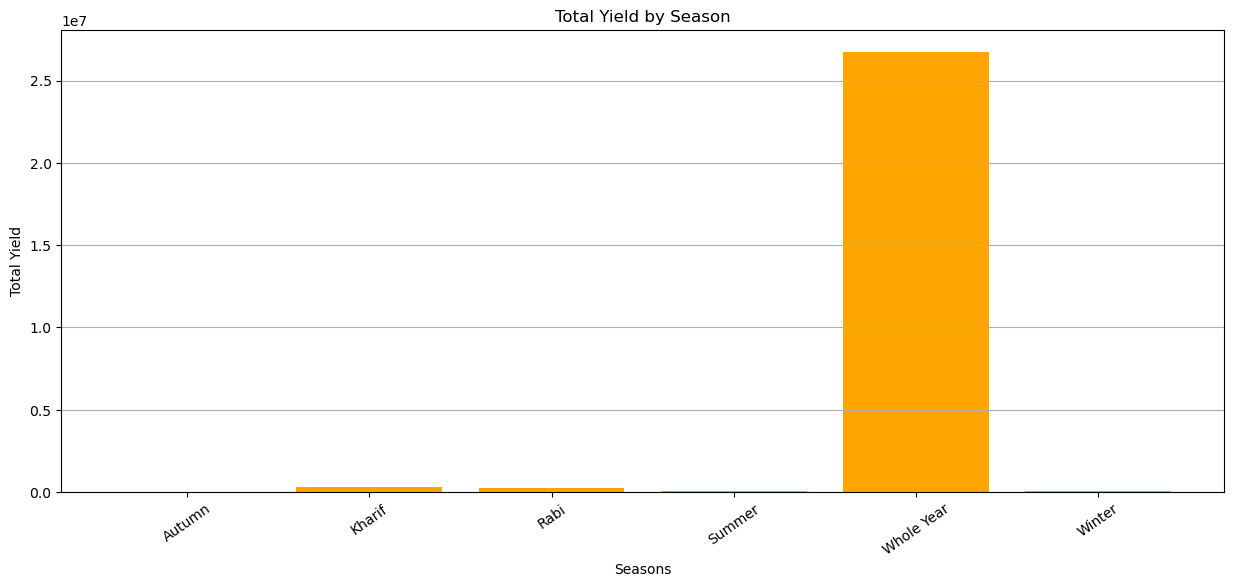

In [84]:
plt.figure(figsize=(15,6))
plt.bar(total_yield_season['Season'], total_yield_crops['Yield'], color='orange')
plt.xlabel('Seasons')
plt.ylabel('Total Yield')
plt.title('Total Yield by Season')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

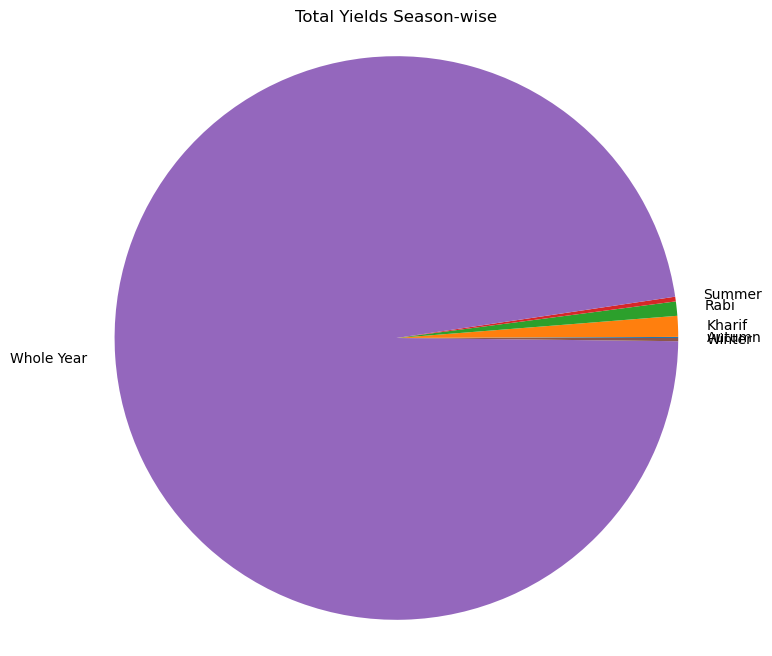

In [82]:
plt.figure(figsize=(8,8))
plt.pie(total_yield_season['Yield'], labels=total_yield_season['Season'])
plt.axis('equal')
plt.title('Total Yields Season-wise')
plt.show()

##### District vs Yield

In [94]:
total_yield_district = df.groupby('District')['Yield'].sum().reset_index()
top_20_district = total_yield_district.sort_values(by='Yield', ascending=False).head(20)
top_20_district.head(1)

,District,Yield
0,24 PARAGANAS NORTH,362221.105762


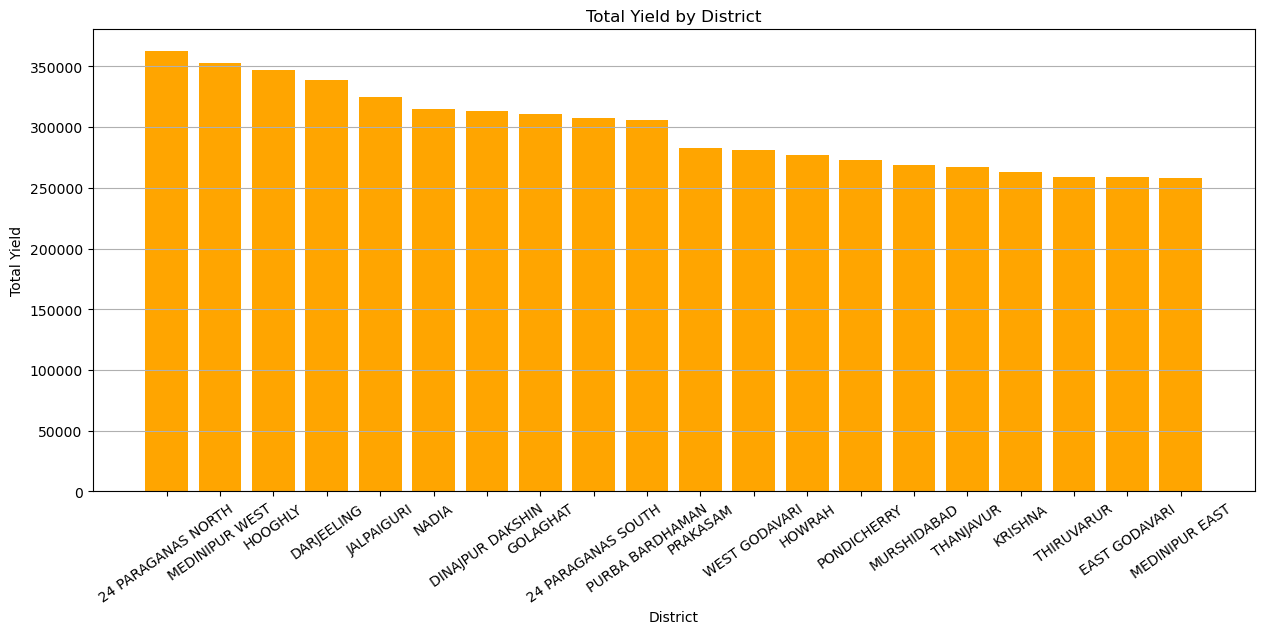

In [96]:
plt.figure(figsize=(15,6))
plt.bar(top_20_district['District'], top_20_district['Yield'], color='orange')
plt.xlabel('District')
plt.ylabel('Total Yield')
plt.title('Total Yield by District')
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.show()

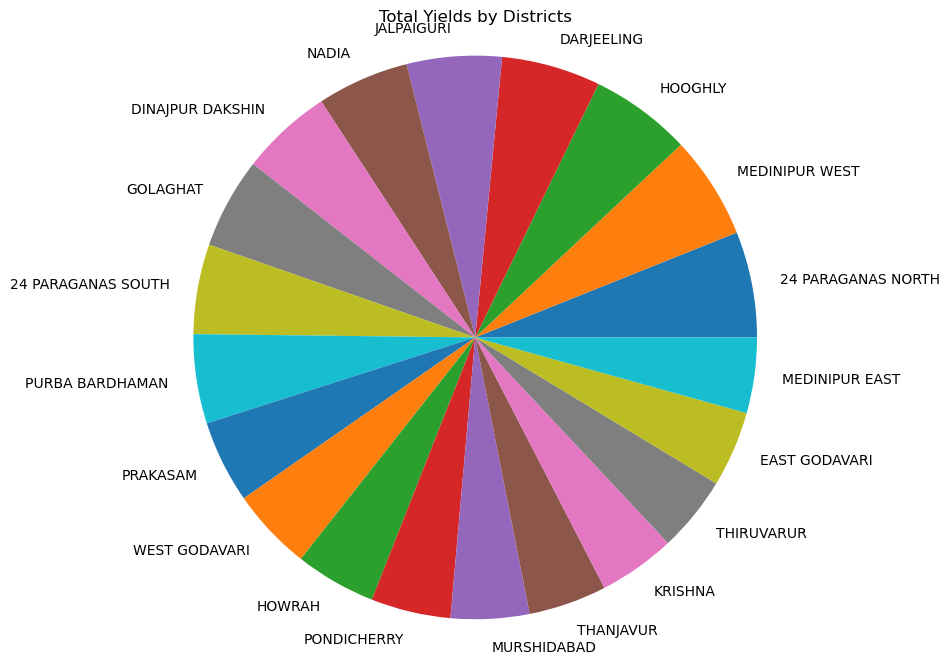

In [98]:
plt.figure(figsize=(8,8))
plt.pie(top_20_district['Yield'], labels=top_20_district['District'])
plt.axis('equal')
plt.title('Total Yields by Districts')
plt.show()

##### 24 Paraganas Nort tops the list of district followed by Medinipur west and Hooghly

## Conclusion...
### In terms of Productions :-
##### Utter Pradesh tops as a state
##### Kheri tops as a district
##### Sugarcane tops as a crop
##### Whole year (Non-seasonal crops) tops as a season


### In terms of Yields :-
##### Tamil Nadu tops as a state
##### 24 Paraganas Nort as a district
##### Coconut tops as a crop
##### Whole year (Non-seasonal crops) tops as a season

### This is just a sample visualization of some parts of data. There are still a lot to do...in terms of area required for each crops, or state vs area and many more...